In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [2]:
def convolve_im_freq(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    im_fft = np.fft.fft2(im)                 # FFT of the image
    fft_pass = im_fft * fft_kernel           # Convolution in the frequency domain

    # Visualize FFT of image
    im_fft_vis = np.fft.fftshift(im_fft)     # Shifting zero-freq component
    im_fft_vis = np.sqrt(im_fft_vis.real**2 + im_fft_vis.imag**2) # Magnitude of the FFT
    im_fft_vis = np.log(im_fft_vis + 1)      # Log scaling

    # Visualize kernel
    fft_kernel_vis = fft_kernel.copy()
    # fft_kernel_vis = np.fft.fftshift(fft_kernel)     # Shifting zero-freq component
    # fft_kernel_vis = np.sqrt(fft_kernel_vis.real**2 + fft_kernel_vis.imag**2) # Magnitude of the FFT
    # fft_kernel_vis = np.log(fft_kernel_vis + 1)      # Log scaling

    # Visualize filtered FFT image
    fft_pass_vis = np.fft.fftshift(fft_pass)     # Shifting zero-freq component
    fft_pass_vis = np.sqrt(fft_pass_vis.real**2 + fft_pass_vis.imag**2) # Magnitude of the FFT
    fft_pass_vis = np.log(fft_pass_vis + 1) # Log scaling

    # Inverse FFT
    conv_result = np.fft.ifftshift(fft_pass)        # Inverse FFT
    conv_result = np.fft.ifft2(fft_pass).real       # Inverse FFT
    # conv_result = np.abs(conv_result)               # Take the absolute value
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(im_fft_vis, cmap="gray")
        plt.title("FFT Image")
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(fft_kernel_vis, cmap="gray")
        plt.title("FFT Kernel")

        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.title("Filtered FFT Image")
        plt.imshow(fft_pass_vis, cmap="gray")
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        
        

    ### END YOUR CODE HERE ###
    return conv_result

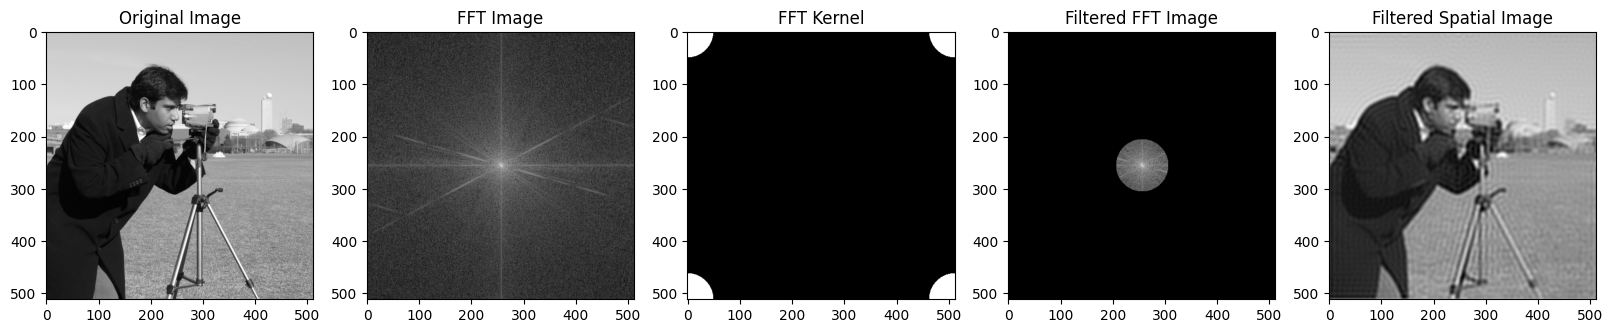

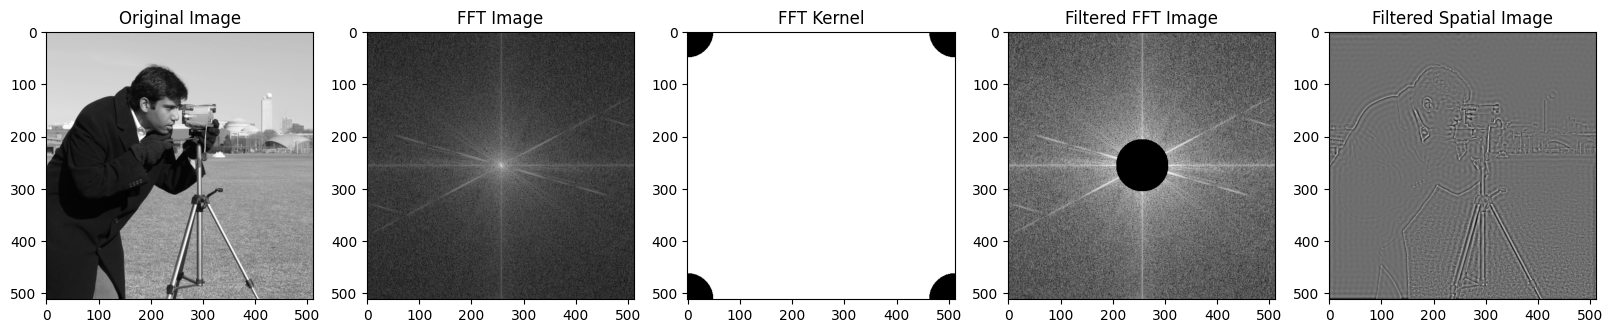

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


c:\Users\jonas\OneDrive - NTNU\Generelt\Studiene\Git_repo\Image_processing\Assignment_2\utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [3]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im_freq(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im_freq(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)